# <mark style="background-color: lightblue"> Analysis_4_Take2_Scientific_Diving_Humboldt_Survey</mark>

In [1]:
## run this cell, then restart your kernel. Do not rerun this cell again until your kernel either crashes or it's been a few hours. 
!pip install plotnine
!pip install matplotlib==3.8.3

!pip install scikit-misc

!pip install seaborn

!pip install --upgrade seaborn matplotlib

  Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.8 kB)
Using cached matplotlib-3.8.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.1
    Uninstalling matplotlib-3.10.1:
      Successfully uninstalled matplotlib-3.10.1
  Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.10.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.3
    Uninstalling matplotlib-3.8.3:
      Successfully uninstalled matplotlib-3.8.3


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from plotnine import *
from plotnine.data import *
from skmisc import *
import seaborn as sns
import re
from PIL import Image, ImageOps
import warnings 
warnings.filterwarnings('ignore') 

### 4. Cal Poly Humboldt Sci Diving Survey Data
**Source:** Richard Avarez and Joanie Hardcastle   
**Obtained:** Google Drive  
**Original File Name:** Data_Entry_Caspar.xlsx  
**Dataframe:** ```scidiv_caspar```  
**Purpose:** The dataset is a product of Cal Poly Humboldt's dive program, where scientific-divers in training perform reef surveys. This data is collected on ReefCheck Survey sheets. This is done to train AAUS scientific divers. This data in particular was collected with the dual intention for Joanie Hardcastle (Oceanography 25') to conduct undergraduate research with the purpose to monitor Caspar Cove's ecosystem and urchin populations. Alterations to the dataframe will aimed to be created so that future projects using the same excel file and following the same format can utilize functions. 

In [2]:
scidiv_caspar = pd.read_excel('SciDiv_Caspar_Fall_24.xlsx')
scidiv_caspar

,Date,Site,Diver,Buddy,Visibility,Transect,Start Depth (ft),End Depth (ft),Start Time,End Time,...,Cover,Relief,Invertebrate Code (Blank if UPC),Count,Size (mm),Distance (m),Kelp Code (Blank if UPC),Count.1,Distance (m).1,Notes
0,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,9.0,4m,NaN
1,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,73.0,4m,NaN
2,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,140,30,NaN,NaN,NaN,NaN
3,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,147,30,NaN,NaN,NaN,NaN
4,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,159,30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,98.0,5,NaN
458,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,143.0,5,NaN
459,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,BK+,62.0,5,NaN
460,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,LS,107.0,5,NaN


In [3]:
scidiv_caspar.info()

scidiv_caspar.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   462 non-null    object 
 1   Site                                   462 non-null    object 
 2   Diver                                  462 non-null    object 
 3   Buddy                                  462 non-null    object 
 4   Visibility                             462 non-null    object 
 5   Transect                               462 non-null    object 
 6   Start Depth (ft)                       327 non-null    object 
 7   End Depth (ft)                         234 non-null    object 
 8   Start Time                             270 non-null    object 
 9   End Time                               270 non-null    object 
 10  Heading (degrees)                      377 non-null    float64
 11  UPC Me

Index(['Date', 'Site', 'Diver', 'Buddy', 'Visibility', 'Transect',
       'Start Depth (ft)', 'End Depth (ft)', 'Start Time', 'End Time',
       'Heading (degrees)', 'UPC Meter Mark (Blank if Kelp/Invert)',
       'Substrate', 'Cover', 'Relief', 'Invertebrate Code (Blank if UPC)',
       'Count', 'Size (mm)', 'Distance (m)', 'Kelp Code  (Blank if UPC)',
       'Count.1', 'Distance (m).1', 'Notes'],
      dtype='object')

```scidiv_caspar``` has 23 columns. 
- ```Date``` is the date the survay was taken in YYYY-MM-DD format. Object. Will be converted to datetime.
- ```Site``` provides the site location for the dive. Beach name and state. Object. 
- ```Diver``` gives the name, first or first and last, of the diver. Object.
- ```Buddy``` gives the name, first or first and last, of the diver's buddy. Object. 
- ```Visibility``` is the visibilty underwater at the site in meters. Object.
- ```Transect``` is the survey transect at that site on that day. Ranges from F1-F7. Object.  
- ```Start Depth (ft)``` is the start depth of the transect. Should be present for UPC recordings. Objects. Objects because people include units.
- ```End Depth (ft)``` is the end depth of the transect. Should be present for UPC recordings. Floats. 
- ```Start Time``` is the time the survey was started, local time OR it is the time of the dive for the diver (ie. 6 minutes into the dive is 0:06, or 0:06:00). Object.  
- ```End Time``` is the time the survey was ended, same formats as Start Time. Object.
- ```Heading (degrees)``` is the heading the diver was headed on while performing the survey. Float. 
- ```UPC Meter Mark (Blank if Kelp Invert)``` is the space marker determining the location of the rows data along the transect line. Float.  
- ```Substrate``` are the categories of substrate found at each UPC meter mark. (Sand(S), Cobble(C), Boulder(B), Reef(R) and Other (0) based on the size and or type of object. Object.
- ```Cover``` are the different organic covers that could be on the UPC meter mark. Options: None(N), Brown Kelp Holdfast(B), Other Brown Algae (OB), Acid Weed (AW), Green Algae(G), Red Algae(R), Encrusting Red Algae(E), Articulated Coraline(AC), Crustose Coralline (CC), Sessile Invertibrates(SI), Mobile Invertebrates (MI), and Seagrasses (SG) according to the reef check survey sheet. Object.
- ```Relief``` is maximum height difference of a box 0.5m by 1.0, in front of the point. Ranges from 0: 0 to 10 cm, 1: >10cm to 1m, 2: >1m to 2m, 3: >2m. Float.
- ```Invertebrate Code (Blank if UPC)``` is a shorthand code for invertebrates found. Options present: 'RDA': Red Abalone, 'GBC': Gumboot Chiton, 'OCS': Ochre Star, 'PTA': Pinto Abalone, 'PPU': Purple Urchin, 'RDU': Red Urchin, 'LGA': Lg Anemone. There are options for every species Reef Check has recorded along the west coast. Object. NA if UPC or if Kelp
- ```Count``` is the count of the total invertebrate species found for a distance, or None if count not recorded.  
- ```Size (mm)``` is the size of abalone if found, or None if size not recorded. Objects with digits. 
- ```Distance (m)``` is the distance of the transect for which the count is referenced to, or None if distance not recorded. Float.  
- ```Kelp Code (Blank if UPC)``` is the shorthand code for kelp species found. Options present: 'BK+', 'PT+', 'NB', 'PT-', nan, 'BK-', 'LS+', 'LS-', 'LS', 'PK+'. BK: Bull Kelp, NB: No blade, PT: Woody Kelp, LS: Torn Kelp, no idea was PK plus is yet, not listed on the chart. Object.
- ```Count.1``` is the amount of species counted, either counts or stipes depending on type of organism and species, or None if count not recorded. Object. 
- ```Distance (m).1``` is the length of the transect if the diver was conducting the kelp portion, or None if distance not recorded. Object. Need to be converted to float. 
- ```Notes``` notes about errors in data or unexpected things, etc while transfering survey sheets to excel. Object.



In [4]:
print(scidiv_caspar.isna().sum().sort_values(),
      '\n\nThe maximum amount of NaN values in a row is Notes at:',
      scidiv_caspar.isna().sum().max(),
      '\n\nUnique Values for Invertebrate Codes:',

scidiv_caspar.iloc[:,15].unique(),
      '\n\nUnique Values for Kelp Codes:',

scidiv_caspar.iloc[:,19].unique())

Date                                       0
Site                                       0
Diver                                      0
Buddy                                      0
Visibility                                 0
Transect                                   0
Heading (degrees)                         85
Start Depth (ft)                         135
Relief                                   162
UPC Meter Mark (Blank if Kelp/Invert)    162
Cover                                    162
Substrate                                162
Start Time                               192
End Time                                 192
End Depth (ft)                           228
Invertebrate Code (Blank if UPC)         344
Count                                    350
Size (mm)                                355
Kelp Code  (Blank if UPC)                418
Count.1                                  418
Distance (m)                             427
Distance (m).1                           442
Notes     

There are:
- 0 NA rows included left over from upload, still want to check though. 
- The maximum amount of NaN in a column is 447 values in Notes, followed by Distance (m).1, and Distance (m). This is because there are many blank entries due to the length difference between UPC Meter Surveys and the entries for Kelp and Invertebrate Surveys. 
- Unique Values for Invertebrate Codes are 'RDA', 'RDU', 'GBC', 'OCS', 'PTA', 'PPU', and 'LGA' and nan. Unique Values for Kelp Codes are 'PT-', 'PT+', BK-', 'BK+', 'TK', 'FB', 'NB', 'LS+', 'LS-', 'LS', and 'BK' and nan. This tells us that:
    - Invertebrate Codes are 3 uppercase letters
    - Kelp Codes are 2 uppercase letters followed by nothing, a dash, or a plus sign. 
    - NaN values are present in both columns (true of all at the moment)



Cleaning To Do List:
1. Drop all rows with Date = NaN

2. Initial Inspection of relationships

3. Figure out where they are located in relation to each other for spatial relationships

2. Rename all headings to have no spaces
   
4. Date  
    a. Use regex to convert dates all into one usable format,   
    b. Convert Date to Datetime format   
    c. Add "DateOrdinal" column int   
    d. Add "DayofYear" column   int    

3. Change all entries in "Size", Visibility, Depths, etc from strings to float, using regex to extract the digits  

5. Add 'Area_m2'column  

6. Create 3 new dataframes: one for UPC, one for invert, one for kelp  

7. Drop irrelevant rows from them

9. Go through and convert relevant strings to floats

In [5]:
#1
scidiv_caspar = scidiv_caspar.dropna(axis=0,subset='Date')
scidiv_caspar

,Date,Site,Diver,Buddy,Visibility,Transect,Start Depth (ft),End Depth (ft),Start Time,End Time,...,Cover,Relief,Invertebrate Code (Blank if UPC),Count,Size (mm),Distance (m),Kelp Code (Blank if UPC),Count.1,Distance (m).1,Notes
0,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,9.0,4m,NaN
1,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,73.0,4m,NaN
2,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,140,30,NaN,NaN,NaN,NaN
3,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,147,30,NaN,NaN,NaN,NaN
4,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,159,30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,98.0,5,NaN
458,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,143.0,5,NaN
459,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,BK+,62.0,5,NaN
460,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,LS,107.0,5,NaN


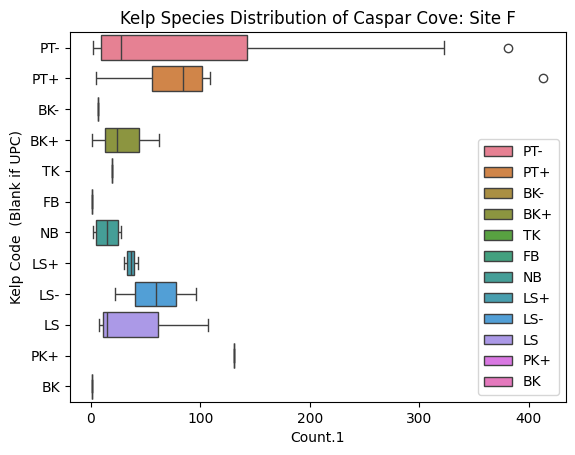

In [6]:
sns.boxplot(scidiv_caspar, x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')

plt.title('Kelp Species Distribution of Caspar Cove: Site F')
plt.legend(loc='lower right')
plt.show()


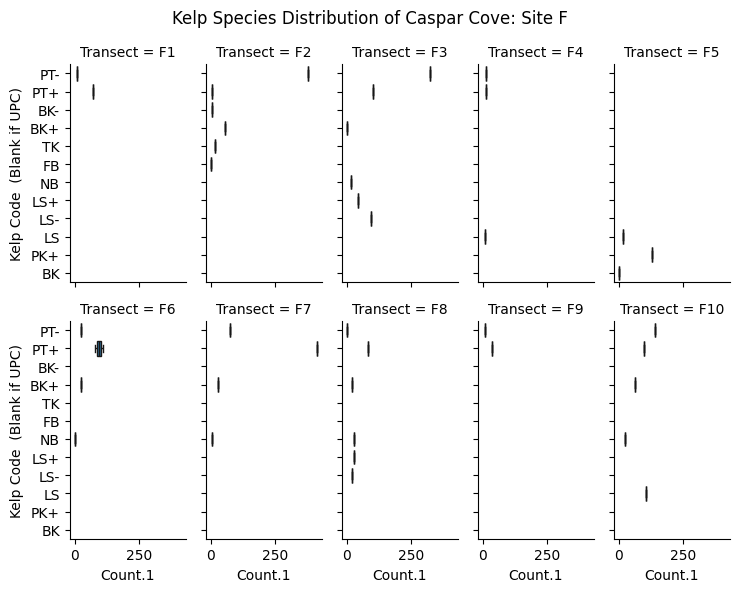

In [7]:
tkdg_box = sns.FacetGrid(scidiv_caspar, col='Transect', col_wrap=5, sharey=True, margin_titles=True, aspect=0.5)
tkdg_box.map_dataframe(sns.boxplot, x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
plt.suptitle('Kelp Species Distribution of Caspar Cove: Site F')
plt.tight_layout()
plt.show()

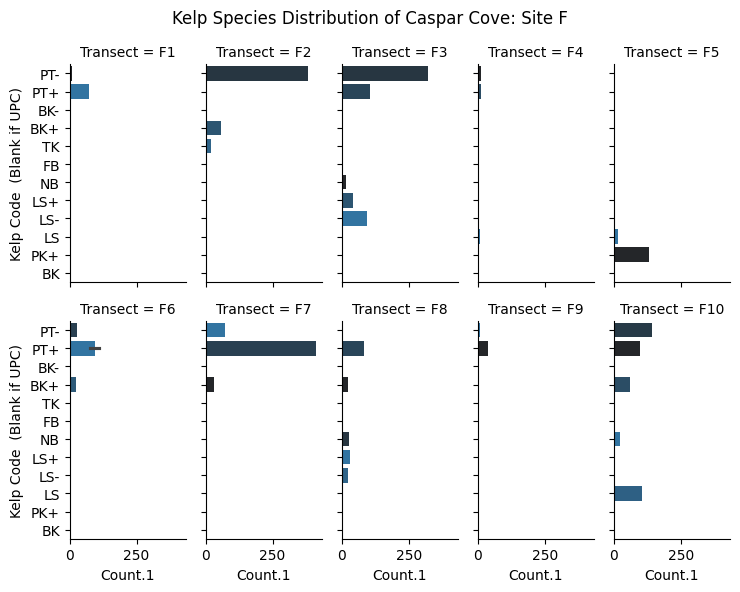

In [8]:
tkdg_bar = sns.FacetGrid(scidiv_caspar, col='Transect', col_wrap=5, sharey=True, margin_titles=True, aspect=0.5)
tkdg_bar.map_dataframe(sns.barplot, x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
plt.suptitle('Kelp Species Distribution of Caspar Cove: Site F')
plt.tight_layout()
plt.show()

## Use Image of Transect Locations to Get Spatial Orientation of Transects

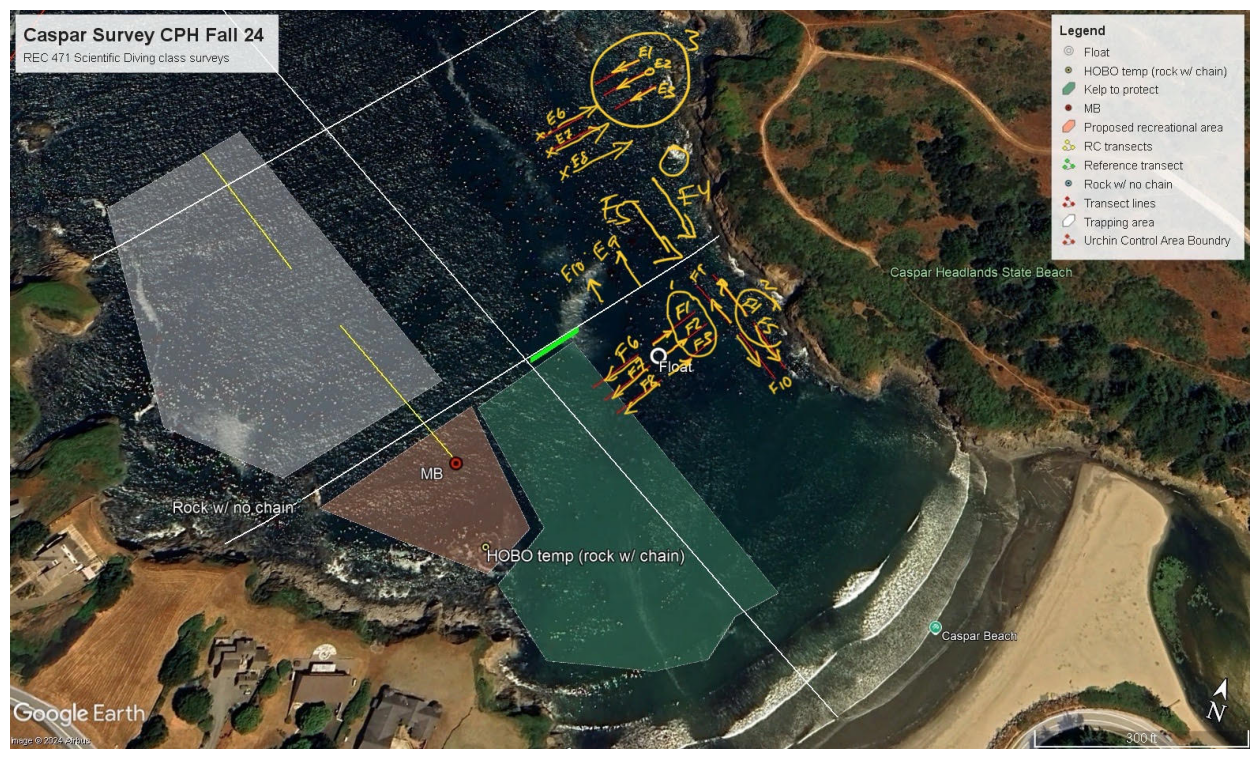

In [9]:
img=np.array(Image.open('Caspar_Surveys_Transect_Map_cropped.jpg'))
plt.figure(figsize=(16,16))
plt.imshow(img)
plt.axis('off')
plt.show()

## Order of Transects by Distance from Shore:
F6-F8 are parallel to shore and sequentially shallower to shore. This group of transects are farthest from the Wall (South West Parallel Transect Group).  
F1-F3 are parallel to shore and sequentially shallower to shore. This group of Transects are the second farthest from the wall (North West Parallel Transect Group).  
F4 & F9 are perpendicular to shore, and F4 is closest to the wall (West Perpendicular Transect Group).  
F5 & F10 are perpendicular to shore, and F5 is closest to the wall (East Perpendicular Transect Group).  


$$
\begin{pmatrix}
F6 & F1\\
F7 & F2\\
F8 & F3
\end{pmatrix}
\begin{pmatrix} 
F9 & F4\\
F10 & F5
\end{pmatrix}
$$

$$
\begin{pmatrix}
West Perpendicular Transect Group = & East Perpendicular Transect Group = \\
North West Parallel Transect Group ||| \\
South West Parallel Transect Group |||  
\end{pmatrix}
$$

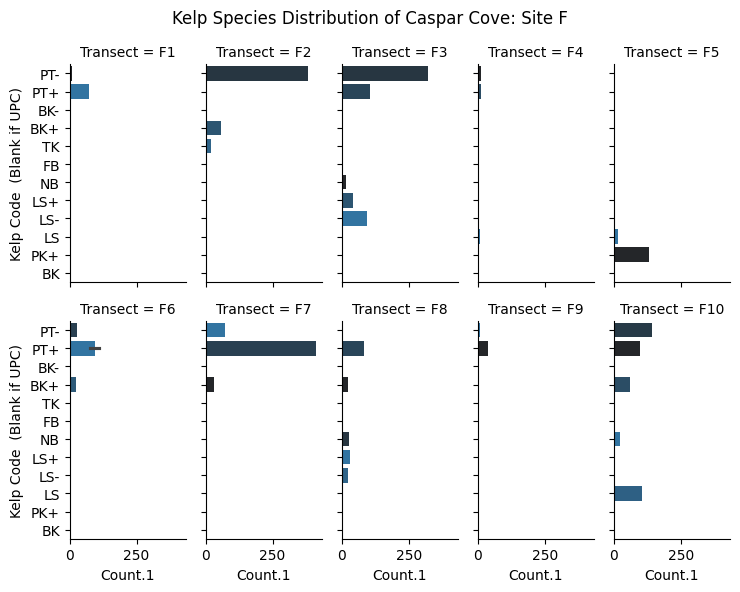

In [10]:
tkdg_bar = sns.FacetGrid(scidiv_caspar, col='Transect', col_wrap=5, sharey=True, margin_titles=True, aspect=0.5)
tkdg_bar.map_dataframe(sns.barplot, x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
plt.suptitle('Kelp Species Distribution of Caspar Cove: Site F')
plt.tight_layout()
plt.show()

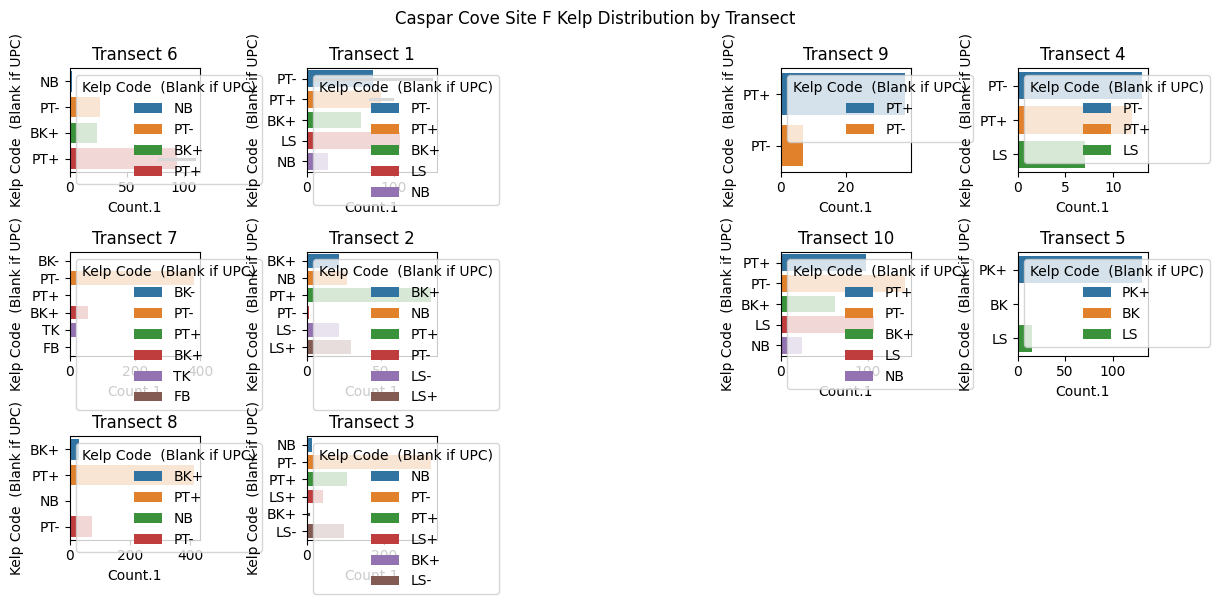

In [11]:
tkdg_bar1 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F1',regex=True))]
tkdg_bar2 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F2',regex=True))]
tkdg_bar3 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F3',regex=True))]
tkdg_bar4 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F4',regex=True))]
tkdg_bar5 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F5',regex=True))]
tkdg_bar6 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F6',regex=True))]
tkdg_bar7 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F7',regex=True))]
tkdg_bar8 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F8',regex=True))]
tkdg_bar9 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F9',regex=True))]
tkdg_bar10 = scidiv_caspar[(scidiv_caspar.Transect.str.contains(r'F10',regex=True))]

fig = plt.figure(figsize=(12,6))

gs = fig.add_gridspec(nrows=3, ncols=5, width_ratios = [1,1,1,1,1])
                      
axpar = np.array([[fig.add_subplot(gs[i,j]) for j in range(2)] for i in range(3)]) 

axperp = np.array([[fig.add_subplot(gs[i, j + 3]) for j in range(2)] for i in range(2)])
                      

#Farthest From Shore
sns.barplot(data=tkdg_bar6,ax=axpar[0,0], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
sns.barplot(data=tkdg_bar1, ax=axpar[0,1], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
#Center
sns.barplot(data=tkdg_bar2,ax=axpar[1,0], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
sns.barplot(data=tkdg_bar8,ax=axpar[1,1], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
#Closest to shore                   
sns.barplot(data=tkdg_bar7, ax=axpar[2,0], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
sns.barplot(data=tkdg_bar3,ax=axpar[2,1], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')

                      
#West Perpendicular                     
sns.barplot(data=tkdg_bar9, ax=axperp[0,0], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
sns.barplot(tkdg_bar4, ax=axperp[0,1], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
#East Perpendicular                   
sns.barplot(data=tkdg_bar10, ax=axperp[1,0], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')
sns.barplot(data=tkdg_bar5, ax=axperp[1,1], x='Count.1', y='Kelp Code  (Blank if UPC)', hue='Kelp Code  (Blank if UPC)')


axpar[0,0].set_title('Transect 6')
axpar[0,1].set_title('Transect 1')
                      
axpar[1,0].set_title('Transect 7')
axpar[1,1].set_title('Transect 2')
                      
axpar[2,0].set_title('Transect 8')
axpar[2,1].set_title('Transect 3')

axperp[0,0].set_title('Transect 9')
axperp[0,1].set_title('Transect 4')
axperp[1,0].set_title('Transect 10')
axperp[1,1].set_title('Transect 5')                 
                      
plt.suptitle('Caspar Cove Site F Kelp Distribution by Transect')
fig.tight_layout()
plt.show()


## Good Start! Can see spatial distribution, but back to cleaning:

#### Rename Columns:

In [12]:
##back to cleaning!! Renaming headings


columns = list(scidiv_caspar.columns)
columns

['Date',
 'Site',
 'Diver',
 'Buddy',
 'Visibility',
 'Transect',
 'Start Depth (ft)',
 'End Depth (ft)',
 'Start Time',
 'End Time',
 'Heading (degrees)',
 'UPC Meter Mark (Blank if Kelp/Invert)',
 'Substrate',
 'Cover',
 'Relief',
 'Invertebrate Code (Blank if UPC)',
 'Count',
 'Size (mm)',
 'Distance (m)',
 'Kelp Code  (Blank if UPC)',
 'Count.1',
 'Distance (m).1',
 'Notes']

In [13]:
columns_nospace = [re.sub(r' ',r'_', i) for i in columns]
columns_nospace 
columns_good = [re.sub(r'_\(Blank.*','',i) for i in columns_nospace]
columns_great = [i.lower() for i in columns_good ]
columns_great

['date',
 'site',
 'diver',
 'buddy',
 'visibility',
 'transect',
 'start_depth_(ft)',
 'end_depth_(ft)',
 'start_time',
 'end_time',
 'heading_(degrees)',
 'upc_meter_mark',
 'substrate',
 'cover',
 'relief',
 'invertebrate_code',
 'count',
 'size_(mm)',
 'distance_(m)',
 'kelp_code_',
 'count.1',
 'distance_(m).1',
 'notes']

In [14]:
scidiv_caspar.rename(columns=dict(zip(columns,columns_great)), inplace=True)
scidiv_caspar.rename(columns={'kelp_code_':'kelp_code',
                             'count':'amount_invert',
                             'count.1':'amount_kelp'}, inplace=True)
scidiv_caspar

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,cover,relief,invertebrate_code,amount_invert,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes
0,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,9.0,4m,NaN
1,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,73.0,4m,NaN
2,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,140,30,NaN,NaN,NaN,NaN
3,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,147,30,NaN,NaN,NaN,NaN
4,10/05/24,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,159,30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,98.0,5,NaN
458,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,143.0,5,NaN
459,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,BK+,62.0,5,NaN
460,10/5/24,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,LS,107.0,5,NaN


#### Standardize Dates

In [15]:
regex = r'(\d+).(\d+)'
new_dates = [re.findall(regex, i) for i in scidiv_caspar.date]
years = [re.findall(r'\d+.\d+.(\d+)', i) for i in scidiv_caspar.date]
year = [i for i in years if i!=[]][0][0]
year

'24'

In [16]:
new_whole_date = [[f"{month}-{day}-{year}" for month, day in date] for date in new_dates]
new_whole_date 
dates = [i[0] for i in new_whole_date]
dates

['10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-05-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',
 '10-5-24',


In [17]:
scidiv_caspar.date = dates
scidiv_caspar.date = pd.to_datetime(scidiv_caspar.date)
scidiv_caspar

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,cover,relief,invertebrate_code,amount_invert,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes
0,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,9.0,4m,NaN
1,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,73.0,4m,NaN
2,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,140,30,NaN,NaN,NaN,NaN
3,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,147,30,NaN,NaN,NaN,NaN
4,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5M,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,159,30,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-10-05,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,98.0,5,NaN
458,2024-10-05,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,143.0,5,NaN
459,2024-10-05,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,BK+,62.0,5,NaN
460,2024-10-05,Caspar,Steven,Joey,4m,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,LS,107.0,5,NaN


#### Convert columns that should be numerical to floats

In [18]:
scidiv_caspar.columns

Index(['date', 'site', 'diver', 'buddy', 'visibility', 'transect',
       'start_depth_(ft)', 'end_depth_(ft)', 'start_time', 'end_time',
       'heading_(degrees)', 'upc_meter_mark', 'substrate', 'cover', 'relief',
       'invertebrate_code', 'amount_invert', 'size_(mm)', 'distance_(m)',
       'kelp_code', 'amount_kelp', 'distance_(m).1', 'notes'],
      dtype='object')

In [19]:
columns_to_change = ['visibility',
       'start_depth_(ft)', 'end_depth_(ft)',
                     'upc_meter_mark', 'size_(mm)', 'distance_(m)', 'distance_(m).1']

In [20]:
def stringconversion(dataframe_orig, list_of_columns):
    dataframe = dataframe_orig.copy()
    num_floats = {}
    for column in list_of_columns:
        string_list = list(dataframe[column])
        num_regex = r'[\d]+\.[\d]+|[\d]+'
        
        num_string = []
        for i in string_list:
            if pd.isna(i):
                num_string.append(np.nan)
            elif type(i)==int:
                num_string.append(float(i))
            elif type(i)==float:
                num_string.append(i)
            else:
                found = re.findall(num_regex, str(i))
                if found:
                    num_string.append(float(found[0]))
                else: 
                    num_string.append(np.nan)
        num_floats[column] = num_string
    return num_floats


In [21]:
def dataconversion(dataframe_orig, list_of_columns):
    dataframe = dataframe_orig.copy()
    num_floats = {}
    for column in list_of_columns:
        string_list = list(dataframe[column])
        num_regex = r'[\d]+\.[\d]+|[\d]+'
        
        num_string = []
        for i in string_list:
            if pd.isna(i):
                num_string.append(np.nan)
            elif type(i)==int:
                num_string.append(float(i))
            elif type(i)==float:
                num_string.append(i)
            else:
                found = re.findall(num_regex, str(i))
                if found:
                    num_string.append(float(found[0]))
                else: 
                    num_string.append(np.nan)
        dataframe[column] = num_string
    return dataframe


In [22]:
dataconversion(scidiv_caspar, columns_to_change)

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,cover,relief,invertebrate_code,amount_invert,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes
0,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,9.0,4.0,NaN
1,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,73.0,4.0,NaN
2,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,140.0,30.0,NaN,NaN,NaN,NaN
3,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,147.0,30.0,NaN,NaN,NaN,NaN
4,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,159.0,30.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,98.0,5.0,NaN
458,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,143.0,5.0,NaN
459,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,BK+,62.0,5.0,NaN
460,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,LS,107.0,5.0,NaN


In [23]:
stringconversion(scidiv_caspar,columns_to_change)

{'visibility': [3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  3.5,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  4.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  6.0,
  5.5,
  5.5,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,
  5.0,

In [24]:
new = dataconversion(scidiv_caspar,columns_to_change)
unique_values = pd.concat([new[col] for col in ['visibility', 'distance_(m)', 'start_depth_(ft)', 'end_depth_(ft)', 'size_(mm)', 'distance_(m).1']], axis=0).unique()
unique_values

array([  3.5,   4. ,   6. ,   5.5,   5. ,   3. ,   2. ,   7. ,   nan,
        30. ,  18. ,  15. ,  16. ,  12. ,  19. ,  13. ,  17. ,  14. ,
       140. , 147. , 159. , 160. , 174. , 192. , 178. , 190. , 215. ,
       185. , 181. , 200. ,  90. , 120. , 137. , 145. , 169. , 170. ,
       173. , 175. , 186. , 187. , 125. , 130. , 277. , 242. , 139. ,
       150. , 154. , 164. , 180. , 191. , 195. , 230. , 189. , 205. ,
       213. , 220. , 223. , 228. , 196. , 237. , 162. , 166. , 167. ,
       179. ,  11. ,  20. ,  21. ])

In [25]:
scidiv_df = dataconversion(scidiv_caspar, columns_to_change)
scidiv_df

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,cover,relief,invertebrate_code,amount_invert,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes
0,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,9.0,4.0,NaN
1,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,73.0,4.0,NaN
2,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,140.0,30.0,NaN,NaN,NaN,NaN
3,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,147.0,30.0,NaN,NaN,NaN,NaN
4,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,RDA,1.0,159.0,30.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT+,98.0,5.0,NaN
458,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,PT-,143.0,5.0,NaN
459,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,BK+,62.0,5.0,NaN
460,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,NaN,NaN,LS,107.0,5.0,NaN


### Add Date Ordinal and Day of Year to Compare with RCCA Data Later

In [26]:
scidiv_df['dateordinal'] = [i.toordinal() for i in scidiv_df.date]
scidiv_df['dayofyear'] = [i.dayofyear for i in scidiv_df.date]
scidiv_df

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,invertebrate_code,amount_invert,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear
0,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,PT-,9.0,4.0,NaN,739164,279
1,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,PT+,73.0,4.0,NaN,739164,279
2,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,RDA,1.0,140.0,30.0,NaN,NaN,NaN,NaN,739164,279
3,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,RDA,1.0,147.0,30.0,NaN,NaN,NaN,NaN,739164,279
4,2024-10-05,Caspar Beach,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,RDA,1.0,159.0,30.0,NaN,NaN,NaN,NaN,739164,279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,PT+,98.0,5.0,NaN,739164,279
458,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,PT-,143.0,5.0,NaN,739164,279
459,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,BK+,62.0,5.0,NaN,739164,279
460,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,NaN,LS,107.0,5.0,NaN,739164,279


### Standardize Site Name, add Block

In [27]:
scidiv_df['site'] = 'Caspar'
scidiv_df['block'] = 'F'
scidiv_df

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,amount_invert,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,PT-,9.0,4.0,NaN,739164,279,F
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,PT+,73.0,4.0,NaN,739164,279,F
2,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,1.0,140.0,30.0,NaN,NaN,NaN,NaN,739164,279,F
3,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,1.0,147.0,30.0,NaN,NaN,NaN,NaN,739164,279,F
4,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,1.0,159.0,30.0,NaN,NaN,NaN,NaN,739164,279,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,PT+,98.0,5.0,NaN,739164,279,F
458,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,PT-,143.0,5.0,NaN,739164,279,F
459,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,BK+,62.0,5.0,NaN,739164,279,F
460,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,LS,107.0,5.0,NaN,739164,279,F


### Need to come up with way to standardize names

In [28]:
diver = scidiv_df.diver.unique()
diver

array(['Mariana S', 'Sam ', 'Hailey ', 'Galina', 'Rafael Cribley',
       'Madie H', 'Amanda Coorey', 'Nick Salgado', 'Jocelyn M',
       'Grace Johnson', 'Alex', 'Camille W. ', 'Joanie', 'Aiden', 'Mina',
       'Claire S', 'Dakota Kalvaitis', 'Casey Vellutato', 'Joey',
       'Steven'], dtype=object)

In [29]:
buddy = scidiv_df.buddy.unique()

In [30]:
def diver_nickname_converter(dataframe1, diver_column, buddy_column):
    dataframe = dataframe1.copy()
    diver_name_saver = []
    buddy_name_saver = []
    for name in dataframe[diver_column]:
    
        regex=r'^' + re.escape(name[0:3])
        found_name = [i for i in dataframe[buddy_column] if re.match(regex, str(i))]
        if len(found_name[0])>=len(name):
            diver_name_saver.append(found_name[0])
        else:
            diver_name_saver.append(name)
            
    for name in dataframe[buddy_column]:
    
        regex=r'^' + re.escape(name[0:3])
        found_name = [i for i in dataframe[diver_column] if re.match(regex, str(i))]
        if len(found_name[0])>=len(name):
            buddy_name_saver.append(found_name[0])
        else:
            buddy_name_saver.append(name)
    dataframe[diver_column] = diver_name_saver
    dataframe[buddy_column] = buddy_name_saver
    return dataframe


In [31]:
regex = r'^'+re.escape(diver[4][0:3])

In [32]:
[re.findall(regex, i) for i in buddy]

[[],
 [],
 [],
 [],
 [],
 ['Raf'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 []]

In [33]:
scidiv_df = diver_nickname_converter(scidiv_df, 'diver', 'buddy')
scidiv_df

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,amount_invert,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,PT-,9.0,4.0,NaN,739164,279,F
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,PT+,73.0,4.0,NaN,739164,279,F
2,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,1.0,140.0,30.0,NaN,NaN,NaN,NaN,739164,279,F
3,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,1.0,147.0,30.0,NaN,NaN,NaN,NaN,739164,279,F
4,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,1.0,159.0,30.0,NaN,NaN,NaN,NaN,739164,279,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,PT+,98.0,5.0,NaN,739164,279,F
458,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,PT-,143.0,5.0,NaN,739164,279,F
459,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,BK+,62.0,5.0,NaN,739164,279,F
460,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,NaN,LS,107.0,5.0,NaN,739164,279,F


In [34]:
scidiv_df.diver.unique()

array(['Mariana S', 'Sam Carlson', 'Hailey ', 'Galina', 'Rafael Cribley',
       'Maddie Ho', 'Amanda Coorey', 'Nick Salgado', 'Jocelyn M',
       'Grace Johnson', 'Alex C. ', 'Camille W. ', 'Joanie', 'Aiden',
       'Mina B', 'Claire S', 'Dakota Kalvaitis', 'Casey Vellutato',
       'Joey', 'Steven'], dtype=object)

In [35]:
scidiv_df.buddy.unique()

array(['Sam Carlson', 'Mariana S', 'Galina', 'Hailey ', 'Maddie Ho',
       'Rafael Cribley', 'Nick Salgado', 'Amanda Coorey', 'Grace Johnson',
       'Jocelyn M', 'Camille W. ', 'Alex C. ', 'Aiden', 'Joanie',
       'Claire S', 'Mina B', 'Casey Vellutato', 'Dakota Kalvaitis',
       'Steven', 'Joey'], dtype=object)

**YAY**

### Create length_of_dive column

In [36]:
def length_of_dive(dataframe1, start_time, end_time):
    dataframe = dataframe1.copy()
    lengths = []
    for starttime, endtime in zip(dataframe[start_time], dataframe[end_time]):
        time_diff = pd.to_datetime(str(endtime)) - pd.to_datetime(str(starttime))
        
        lengths.append(time_diff)
    dataframe['length_of_dive_(min)'] = lengths
    ## Convert to seconds and divide by 60 to get total length of dive
    dataframe['length_of_dive_(min)'] = dataframe['length_of_dive_(min)'].dt.total_seconds()/60
    return dataframe

In [37]:
length_of_dive(scidiv_df, 'start_time', 'end_time')

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,PT-,9.0,4.0,NaN,739164,279,F,55.0
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,PT+,73.0,4.0,NaN,739164,279,F,55.0
2,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,140.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
3,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,147.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
4,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,159.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,PT+,98.0,5.0,NaN,739164,279,F,32.0
458,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,PT-,143.0,5.0,NaN,739164,279,F,32.0
459,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,BK+,62.0,5.0,NaN,739164,279,F,32.0
460,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,LS,107.0,5.0,NaN,739164,279,F,32.0


In [38]:
scidiv_df = length_of_dive(scidiv_df, 'start_time', 'end_time')

# Final Check - Make Sure DataTypes are where we want them

In [39]:
scidiv_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  462 non-null    datetime64[ns]
 1   site                  462 non-null    object        
 2   diver                 462 non-null    object        
 3   buddy                 462 non-null    object        
 4   visibility            462 non-null    float64       
 5   transect              462 non-null    object        
 6   start_depth_(ft)      327 non-null    float64       
 7   end_depth_(ft)        234 non-null    float64       
 8   start_time            270 non-null    object        
 9   end_time              270 non-null    object        
 10  heading_(degrees)     377 non-null    float64       
 11  upc_meter_mark        300 non-null    float64       
 12  substrate             300 non-null    object        
 13  cover               

In [40]:
for i in np.arange(0,27,1):
    print(scidiv_df.iloc[:,i].unique())

<DatetimeArray>
['2024-10-05 00:00:00']
Length: 1, dtype: datetime64[ns]
['Caspar']
['Mariana S' 'Sam Carlson' 'Hailey ' 'Galina' 'Rafael Cribley' 'Maddie Ho'
 'Amanda Coorey' 'Nick Salgado' 'Jocelyn M' 'Grace Johnson' 'Alex C. '
 'Camille W. ' 'Joanie' 'Aiden' 'Mina B' 'Claire S' 'Dakota Kalvaitis'
 'Casey Vellutato' 'Joey' 'Steven']
['Sam Carlson' 'Mariana S' 'Galina' 'Hailey ' 'Maddie Ho' 'Rafael Cribley'
 'Nick Salgado' 'Amanda Coorey' 'Grace Johnson' 'Jocelyn M' 'Camille W. '
 'Alex C. ' 'Aiden' 'Joanie' 'Claire S' 'Mina B' 'Casey Vellutato'
 'Dakota Kalvaitis' 'Steven' 'Joey']
[3.5 4.  6.  5.5 5.  3.  2.  7. ]
['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10']
[nan 18. 15. 16. 12. 19. 13. 17.]
[nan 18. 15. 17. 13. 14.]
[datetime.time(10, 45) nan datetime.time(2, 12) datetime.time(2, 11)
 datetime.time(0, 6) datetime.time(2, 25) datetime.time(2, 15)
 datetime.time(14, 28) datetime.time(0, 11) datetime.time(0, 14)]
[datetime.time(11, 40) nan datetime.time(3, 6) datetime.time(2, 3

# Uh oh! Someone made an error in reporting abalone sizes, lets investigate that data

In [41]:
scidiv_df[scidiv_df['invertebrate_code']=='RDA']['size_(mm)'].unique()

array([140., 147., 159., 160., 174., 192.,  nan, 178., 190., 215., 185.,
       181., 200.,  90., 120., 137., 145., 169., 170., 173., 175., 186.,
       187., 130., 139., 150., 154., 164., 180., 191., 195., 230., 189.,
       205., 213., 220., 223., 228., 196., 237., 162., 166., 167., 179.,
        11.,  12.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.])

In [42]:
noabsize = scidiv_df[(scidiv_df['invertebrate_code']=='RDA')&(scidiv_df['size_(mm)'].isna())]
noabsize[['diver','transect','invertebrate_code','amount_invert','size_(mm)']]

,diver,transect,invertebrate_code,amount_invert,size_(mm)
8,Mariana S,F1,RDA,1.0,NaN
9,Mariana S,F1,RDA,1.0,NaN
122,Maddie Ho,F3,RDA,1.0,NaN
176,Nick Salgado,F4,RDA,20.0,NaN
184,Jocelyn M,F5,RDA,30.0,NaN
286,Joanie,F7,RDA,9.0,NaN
427,Joey,F10,RDA,1.0,NaN
428,Joey,F10,RDA,1.0,NaN
429,Joey,F10,RDA,1.0,NaN
430,Joey,F10,RDA,1.0,NaN


In [43]:
yesabsize = scidiv_df[(scidiv_df['invertebrate_code']=='RDA')&(scidiv_df['size_(mm)'].notna())]
yesabsize[['diver','transect','invertebrate_code','amount_invert','size_(mm)']]

,diver,transect,invertebrate_code,amount_invert,size_(mm)
2,Mariana S,F1,RDA,1.0,140.0
3,Mariana S,F1,RDA,1.0,147.0
4,Mariana S,F1,RDA,1.0,159.0
5,Mariana S,F1,RDA,1.0,160.0
6,Mariana S,F1,RDA,1.0,174.0
...,...,...,...,...,...
452,Joey,F10,RDA,1.0,19.0
453,Joey,F10,RDA,1.0,20.0
454,Joey,F10,RDA,1.0,20.0
455,Joey,F10,RDA,1.0,20.0


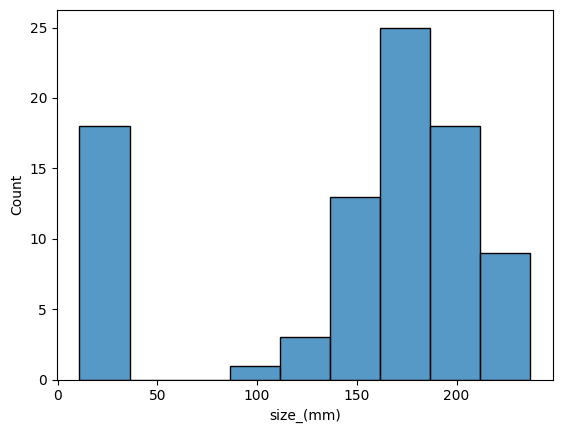

In [44]:
sns.histplot(yesabsize,x='size_(mm)')
plt.show()

Can see that the values below 50 are extremely out of the range seen in other transects. Suspected that diver sized them to centimeters. **Convert to cm by multiplying by 10**

In [45]:
def size_converter(dataframe1, diver_column, size_column):
    dataframe = dataframe1.copy()
    abalone_correct_size = []
    for diver,size in zip(dataframe[diver_column], dataframe[size_column]):
        ## largest ab size in rcca data is 31 cm - gave larger to 40 cm
        if dataframe[dataframe[diver_column]==diver][size_column].mean()>40:
            abalone_correct_size.append(size)
        elif dataframe[dataframe[diver_column]==diver][size_column].mean()<=40:
            abalone_correct_size.append(size*10)
        else:
            abalone_correct_size.append(np.nan)
    dataframe[size_column] = abalone_correct_size
    return dataframe

In [46]:
scidiv_df = size_converter(scidiv_df, 'diver','size_(mm)')
scidiv_df['size_(mm)'].unique()

array([ nan, 140., 147., 159., 160., 174., 192., 178., 190., 215., 185.,
       181., 200.,  90., 120., 137., 145., 169., 170., 173., 175., 186.,
       187., 125., 130., 277., 242.,   2., 139., 150., 154., 164., 180.,
       191., 195., 230., 189., 205., 213., 220., 223., 228., 196., 237.,
       162., 166., 167., 179., 110., 210.])

In [47]:
## where is the 2 coming from?


scidiv_df[scidiv_df['size_(mm)']==2.]

scidiv_df[scidiv_df['diver']=='Nick Salgado'][['amount_invert','size_(mm)']]

,amount_invert,size_(mm)
172,NaN,277.0
173,NaN,242.0
174,NaN,175.0
175,NaN,2.0
176,20.0,NaN
177,1.0,NaN
178,NaN,NaN
179,NaN,NaN
180,NaN,NaN


In [48]:
## Reported the other numbers right, but the number two should probably be in the count column (data entry error - my fault!)

##Need function to convert the size value to Nan and count value to i for each i 
##if size is given as less than 50 and count is empty



In [49]:
def amount_size_switch_check(dataframe1, amount_column, size_column):
    dataframe = dataframe1.copy()
    amount_correct =[]
    abalone_correct_size = []
    for amount, size in zip(dataframe[amount_column], dataframe[size_column]):
        ## if amount is empty and the size is less than 40 mm, then they probably switched them around   
        if pd.isna(amount) and pd.notna(size) and size<=40:
                amount_correct.append(size)
                abalone_correct_size.append(amount)
    ## if the amount for a row is greater than 40 and the size is less than 40, than they got switched around
    ## also, sizing should be relatively unique, so they shouldn't have a value for amount >50 if there is a size given
        elif pd.notna(amount) and amount>40 and pd.notna(size) and size<=40:
            amount_correct.append(size)
            abalone_correct_size.append(amount)
        ## any thing else, correct or otherwise, leave as is
        else:
            amount_correct.append(amount)
            abalone_correct_size.append(size)
    dataframe[amount_column] = amount_correct
    dataframe[size_column] = abalone_correct_size 
    return dataframe

In [50]:
scidiv_df = amount_size_switch_check(scidiv_df, 'amount_invert','size_(mm)')
scidiv_df

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,PT-,9.0,4.0,NaN,739164,279,F,55.0
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,PT+,73.0,4.0,NaN,739164,279,F,55.0
2,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,140.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
3,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,147.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
4,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,159.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,PT+,98.0,5.0,NaN,739164,279,F,32.0
458,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,PT-,143.0,5.0,NaN,739164,279,F,32.0
459,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,BK+,62.0,5.0,NaN,739164,279,F,32.0
460,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,NaN,LS,107.0,5.0,NaN,739164,279,F,32.0


In [51]:
scidiv_df['size_(mm)'].mean()

177.27173913043478

In [52]:
scidiv_df['size_(mm)'].unique()

array([ nan, 140., 147., 159., 160., 174., 192., 178., 190., 215., 185.,
       181., 200.,  90., 120., 137., 145., 169., 170., 173., 175., 186.,
       187., 125., 130., 277., 242., 139., 150., 154., 164., 180., 191.,
       195., 230., 189., 205., 213., 220., 223., 228., 196., 237., 162.,
       166., 167., 179., 110., 210.])

In [53]:
scidiv_df['size_(mm)'].describe()

count     92.000000
mean     177.271739
std       30.789289
min       90.000000
25%      160.000000
50%      180.000000
75%      192.750000
max      277.000000
Name: size_(mm), dtype: float64

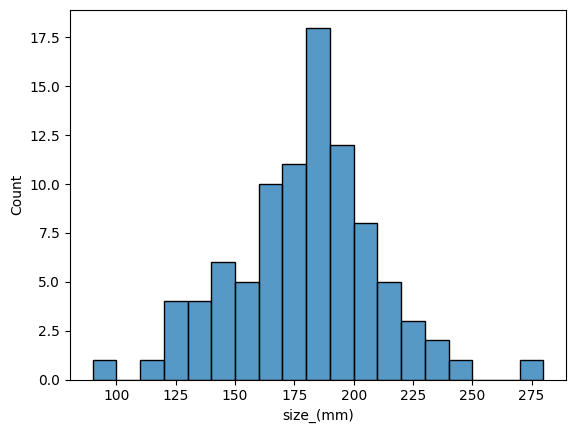

In [54]:
sns.histplot(scidiv_df,x='size_(mm)', bins=np.arange(90,290,10))
plt.show()

**YAY, it worked and increased the mean abalone size by 32 mm compared to pre-cleaning.**

#### Divide up by UPC, Kelp, and Invert

In [55]:
upc_scidiv_df = scidiv_df[scidiv_df['upc_meter_mark'].notna()]
upc_scidiv_df

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
10,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,739164,279,F,55.0
11,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,739164,279,F,55.0
12,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,739164,279,F,55.0
13,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,739164,279,F,55.0
14,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,739164,279,F,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,00:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,739164,279,F,29.0
423,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,00:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,739164,279,F,29.0
424,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,00:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,739164,279,F,29.0
425,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,00:40:00,...,NaN,NaN,NaN,NaN,NaN,NaN,739164,279,F,29.0


In [56]:
kelp_scidiv_df = scidiv_df[scidiv_df['kelp_code'].notna()]
kelp_scidiv_df

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,PT-,9.0,4.0,NaN,739164,279,F,55.0
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,NaN,PT+,73.0,4.0,NaN,739164,279,F,55.0
75,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,...,NaN,NaN,BK-,6.0,NaN,NaN,739164,279,F,NaN
76,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,...,NaN,NaN,PT-,381.0,NaN,NaN,739164,279,F,NaN
77,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,...,NaN,NaN,PT+,5.0,NaN,NaN,739164,279,F,NaN
78,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,...,NaN,NaN,BK+,58.0,NaN,NaN,739164,279,F,NaN
79,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,...,NaN,NaN,TK,19.0,NaN,Unknown Kelp Species Code,739164,279,F,NaN
80,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,...,NaN,NaN,FB,1.0,NaN,Unknown Kelp Species Code,739164,279,F,NaN
85,2024-10-05,Caspar,Rafael Cribley,Maddie Ho,6.0,F3,NaN,NaN,NaN,NaN,...,NaN,NaN,NB,15.0,NaN,NaN,739164,279,F,NaN
86,2024-10-05,Caspar,Rafael Cribley,Maddie Ho,6.0,F3,NaN,NaN,NaN,NaN,...,NaN,NaN,PT-,323.0,NaN,NaN,739164,279,F,NaN


In [57]:
invert_scidiv_df = scidiv_df[scidiv_df['invertebrate_code'].notna()]
invert_scidiv_df

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
2,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,140.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
3,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,147.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
4,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,159.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
5,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,160.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
6,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,174.0,30.0,NaN,NaN,NaN,NaN,739164,279,F,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,00:40:00,...,190.0,NaN,NaN,NaN,NaN,NaN,739164,279,F,29.0
453,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,00:40:00,...,200.0,NaN,NaN,NaN,NaN,NaN,739164,279,F,29.0
454,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,00:40:00,...,200.0,NaN,NaN,NaN,NaN,NaN,739164,279,F,29.0
455,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,00:40:00,...,200.0,NaN,NaN,NaN,NaN,NaN,739164,279,F,29.0


### Drop Columns full of NA

In [58]:
invert_scidiv_df.dropna(axis=1, how='all', inplace=True)
kelp_scidiv_df.dropna(axis=1, how='all', inplace=True)
upc_scidiv_df.dropna(axis=1, how='all', inplace=True)


In [59]:
invert_scidiv_df.reset_index(inplace=True, drop=True)
kelp_scidiv_df.reset_index(inplace=True, drop=True)
upc_scidiv_df.reset_index(inplace=True, drop=True)

In [60]:
display(
    upc_scidiv_df.head(),
    invert_scidiv_df.head(),
    kelp_scidiv_df.head())

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,heading_(degrees),upc_meter_mark,substrate,cover,relief,dateordinal,dayofyear,block,length_of_dive_(min)
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,1.0,C,B,1.0,739164,279,F,55.0
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,2.0,S,E,1.0,739164,279,F,55.0
2,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,3.0,S,N,1.0,739164,279,F,55.0
3,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,4.0,S,B,1.0,739164,279,F,55.0
4,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,5.0,C,B,1.0,739164,279,F,55.0


,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,heading_(degrees),invertebrate_code,amount_invert,size_(mm),distance_(m),notes,dateordinal,dayofyear,block,length_of_dive_(min)
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,RDA,1.0,140.0,30.0,NaN,739164,279,F,55.0
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,RDA,1.0,147.0,30.0,NaN,739164,279,F,55.0
2,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,RDA,1.0,159.0,30.0,NaN,739164,279,F,55.0
3,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,RDA,1.0,160.0,30.0,NaN,739164,279,F,55.0
4,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,RDA,1.0,174.0,30.0,NaN,739164,279,F,55.0


,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,heading_(degrees),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,PT-,9.0,4.0,NaN,739164,279,F,55.0
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,30.0,PT+,73.0,4.0,NaN,739164,279,F,55.0
2,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,30.0,BK-,6.0,NaN,NaN,739164,279,F,NaN
3,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,30.0,PT-,381.0,NaN,NaN,739164,279,F,NaN
4,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,30.0,PT+,5.0,NaN,NaN,739164,279,F,NaN


## Data Has Been Cleaned! Exploratory Data Analysis to Continue



## 1st! How did they do filling out all their data?

In [61]:
upc_scidiv_df.isna().sum()

date                      0
site                      0
diver                     0
buddy                     0
visibility                0
transect                  0
start_depth_(ft)         90
end_depth_(ft)          150
start_time              120
end_time                120
heading_(degrees)        60
upc_meter_mark            0
substrate                 0
cover                     0
relief                    0
dateordinal               0
dayofyear                 0
block                     0
length_of_dive_(min)    120
dtype: int64

In [62]:
len(upc_scidiv_df)

300

_out of 300 rows of data, 90 rows lack a start depth, 150 rows lack an end depth, 120 rows lack a start time and end time, which then leads to 120 rows without duration of dive, and 60 rows without the heading._

**_Who are these divers?_**

In [63]:
upc_scidiv_df[upc_scidiv_df['start_depth_(ft)'].isna()].diver.unique()

array(['Mariana S', 'Rafael Cribley', 'Alex C. '], dtype=object)

In [64]:
upc_scidiv_df[upc_scidiv_df['end_depth_(ft)'].isna()].diver.unique()

array(['Mariana S', 'Hailey ', 'Rafael Cribley', 'Grace Johnson',
       'Alex C. '], dtype=object)

In [65]:
upc_scidiv_df[upc_scidiv_df['start_time'].isna()].diver.unique()

array(['Hailey ', 'Rafael Cribley', 'Amanda Coorey', 'Grace Johnson'],
      dtype=object)

In [66]:
upc_scidiv_df[upc_scidiv_df['end_time'].isna()].diver.unique()

array(['Hailey ', 'Rafael Cribley', 'Amanda Coorey', 'Grace Johnson'],
      dtype=object)

In [67]:
upc_scidiv_df[upc_scidiv_df['heading_(degrees)'].isna()].diver.unique()

array(['Mina B', 'Dakota Kalvaitis'], dtype=object)

**How about inverts?**

In [68]:
invert_scidiv_df.isna().sum()

date                      0
site                      0
diver                     0
buddy                     0
visibility                0
transect                  0
start_depth_(ft)         25
end_depth_(ft)           51
start_time               53
end_time                 53
heading_(degrees)        13
invertebrate_code         0
amount_invert             5
size_(mm)                26
distance_(m)             84
notes                   108
dateordinal               0
dayofyear                 0
block                     0
length_of_dive_(min)     53
dtype: int64

_**There are 25 entries missing start depth, 51 entries missing end depth, 53 missing their start and end times, 13 missing their headings, 14 missing their counts, 25 missing size(expected), 84 missing distance***_

In [69]:
print(invert_scidiv_df[invert_scidiv_df['start_depth_(ft)'].isna()].diver.unique(),'\n\n',

invert_scidiv_df[invert_scidiv_df['end_depth_(ft)'].isna()].diver.unique(),'\n\n',

invert_scidiv_df[invert_scidiv_df['start_time'].isna()].diver.unique(),'\n\n',

invert_scidiv_df[invert_scidiv_df['end_time'].isna()].diver.unique(),'\n\n',

invert_scidiv_df[invert_scidiv_df['heading_(degrees)'].isna()].diver.unique(), '\n\n',
      
invert_scidiv_df[invert_scidiv_df['amount_invert'].isna()].diver.unique(),'\n\n',
      
invert_scidiv_df[invert_scidiv_df['distance_(m)'].isna()].diver.unique(),'\n\n')

['Mariana S' 'Rafael Cribley' 'Jocelyn M' 'Alex C. ' 'Joanie'] 

 ['Mariana S' 'Sam Carlson' 'Hailey ' 'Galina' 'Rafael Cribley' 'Maddie Ho'
 'Jocelyn M' 'Grace Johnson' 'Alex C. ' 'Joanie'] 

 ['Hailey ' 'Galina' 'Rafael Cribley' 'Maddie Ho' 'Amanda Coorey'
 'Nick Salgado' 'Jocelyn M' 'Grace Johnson'] 

 ['Hailey ' 'Galina' 'Rafael Cribley' 'Maddie Ho' 'Amanda Coorey'
 'Nick Salgado' 'Jocelyn M' 'Grace Johnson'] 

 ['Nick Salgado' 'Jocelyn M' 'Joanie' 'Mina B' 'Dakota Kalvaitis'
 'Casey Vellutato'] 

 ['Sam Carlson' 'Nick Salgado'] 

 ['Sam Carlson' 'Hailey ' 'Rafael Cribley' 'Amanda Coorey' 'Nick Salgado'
 'Alex C. ' 'Joanie' 'Aiden' 'Mina B' 'Dakota Kalvaitis' 'Casey Vellutato'
 'Joey'] 




**and Kelp!**

In [70]:
kelp_scidiv_df.isna().sum()

date                     0
site                     0
diver                    0
buddy                    0
visibility               0
transect                 0
start_depth_(ft)        20
end_depth_(ft)          27
start_time              19
end_time                19
heading_(degrees)       12
kelp_code                0
amount_kelp              0
distance_(m).1          24
notes                   39
dateordinal              0
dayofyear                0
block                    0
length_of_dive_(min)    19
dtype: int64

_**There are 20 missing their start depth, 27 missing their end depth, 19 missing their times, 12 missing their heading, 24 missing their distance**_ 

In [71]:
print(kelp_scidiv_df[kelp_scidiv_df['start_depth_(ft)'].isna()].diver.unique(),'\n\n',

kelp_scidiv_df[kelp_scidiv_df['end_depth_(ft)'].isna()].diver.unique(),'\n\n',

kelp_scidiv_df[kelp_scidiv_df['start_time'].isna()].diver.unique(),'\n\n',

kelp_scidiv_df[kelp_scidiv_df['end_time'].isna()].diver.unique(),'\n\n',

kelp_scidiv_df[kelp_scidiv_df['heading_(degrees)'].isna()].diver.unique(), '\n\n',
      
kelp_scidiv_df[kelp_scidiv_df['distance_(m).1'].isna()].diver.unique(),'\n\n')

['Mariana S' 'Rafael Cribley' 'Jocelyn M' 'Joanie' 'Steven'] 

 ['Mariana S' 'Galina' 'Rafael Cribley' 'Maddie Ho' 'Jocelyn M' 'Joanie'
 'Steven'] 

 ['Galina' 'Rafael Cribley' 'Maddie Ho' 'Nick Salgado' 'Jocelyn M'] 

 ['Galina' 'Rafael Cribley' 'Maddie Ho' 'Nick Salgado' 'Jocelyn M'] 

 ['Nick Salgado' 'Jocelyn M' 'Joanie' 'Casey Vellutato'] 

 ['Galina' 'Rafael Cribley' 'Nick Salgado' 'Claire S' 'Casey Vellutato'
 'Steven'] 




What about divers that received notes on their transects?

In [72]:
scidiv_df[scidiv_df.notes.notna()].diver.unique()

array(['Sam Carlson', 'Galina', 'Maddie Ho', 'Nick Salgado', 'Jocelyn M',
       'Camille W. ', 'Joanie'], dtype=object)

what did their notes say?

In [73]:
scidiv_df[scidiv_df.notes.notna()][['diver','notes']]

,diver,notes
40,Sam Carlson,Could be combined onto Mari's (Mariana S) sheet
79,Galina,Unknown Kelp Species Code
80,Galina,Unknown Kelp Species Code
121,Maddie Ho,Does not match Buddy
122,Maddie Ho,Buddy got different abalone counts (buddy less...
172,Nick Salgado,Total counts incorrect
173,Nick Salgado,Counts not summed
174,Nick Salgado,Total counts incorrect
176,Nick Salgado,Did not measure abalone to mm
177,Nick Salgado,Did not measure abalone to mm


**Great! We can figure out who is missing what from their survey sheets**

But we should create a copy of scidiv_df, start populating rows with values instead of nan were necessary, and the apply the same filters to make its sub dataframes for upc...,invert..., and kelp... 

Whole Dataframe Necessary rows:
- Distance
- Distance.1 

Subdataframe Necessary rows:
- Count
- Count.1


In [74]:
finished_scidiv_df = scidiv_df.copy()
finished_scidiv_df

finished_scidiv_df.fillna(value={'distance_(m)':30.0,
                              'distance_(m).1':30.0}, inplace=True)

finished_scidiv_df

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,30.0,PT-,9.0,4.0,NaN,739164,279,F,55.0
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,30.0,PT+,73.0,4.0,NaN,739164,279,F,55.0
2,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,140.0,30.0,NaN,NaN,30.0,NaN,739164,279,F,55.0
3,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,147.0,30.0,NaN,NaN,30.0,NaN,739164,279,F,55.0
4,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,159.0,30.0,NaN,NaN,30.0,NaN,739164,279,F,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,30.0,PT+,98.0,5.0,NaN,739164,279,F,32.0
458,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,30.0,PT-,143.0,5.0,NaN,739164,279,F,32.0
459,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,30.0,BK+,62.0,5.0,NaN,739164,279,F,32.0
460,2024-10-05,Caspar,Steven,Joey,4.0,F10,NaN,NaN,00:14:00,00:46:00,...,NaN,30.0,LS,107.0,5.0,NaN,739164,279,F,32.0


In [75]:
upc_df = finished_scidiv_df[finished_scidiv_df['upc_meter_mark'].notna()]

invert_df = finished_scidiv_df[finished_scidiv_df['invertebrate_code'].notna()]

kelp_df = finished_scidiv_df[finished_scidiv_df['kelp_code'].notna()]


In [76]:
display(
upc_df.head(3),
invert_df.head(3),
kelp_df.head(3))

,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
10,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,30.0,NaN,NaN,30.0,NaN,739164,279,F,55.0
11,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,30.0,NaN,NaN,30.0,NaN,739164,279,F,55.0
12,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,30.0,NaN,NaN,30.0,NaN,739164,279,F,55.0


,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
2,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,140.0,30.0,NaN,NaN,30.0,NaN,739164,279,F,55.0
3,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,147.0,30.0,NaN,NaN,30.0,NaN,739164,279,F,55.0
4,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,159.0,30.0,NaN,NaN,30.0,NaN,739164,279,F,55.0


,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,end_time,...,size_(mm),distance_(m),kelp_code,amount_kelp,distance_(m).1,notes,dateordinal,dayofyear,block,length_of_dive_(min)
0,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,30.0,PT-,9.0,4.0,NaN,739164,279,F,55.0
1,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,11:40:00,...,NaN,30.0,PT+,73.0,4.0,NaN,739164,279,F,55.0
75,2024-10-05,Caspar,Galina,Hailey,4.0,F2,16.0,NaN,NaN,NaN,...,NaN,30.0,BK-,6.0,30.0,NaN,739164,279,F,NaN


In [77]:
invert_df.dropna(axis=1, how='all', inplace=True)
kelp_df.dropna(axis=1, how='all', inplace=True)
upc_df.dropna(axis=1, how='all', inplace=True)


In [78]:

upc_df.reset_index(inplace=True)  # if you don't want to reassign


In [79]:
upc_df

,index,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,...,upc_meter_mark,substrate,cover,relief,distance_(m),distance_(m).1,dateordinal,dayofyear,block,length_of_dive_(min)
0,10,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,1.0,C,B,1.0,30.0,30.0,739164,279,F,55.0
1,11,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,2.0,S,E,1.0,30.0,30.0,739164,279,F,55.0
2,12,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,3.0,S,N,1.0,30.0,30.0,739164,279,F,55.0
3,13,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,4.0,S,B,1.0,30.0,30.0,739164,279,F,55.0
4,14,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,5.0,C,B,1.0,30.0,30.0,739164,279,F,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,422,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,...,26.0,B,OB,1.0,30.0,30.0,739164,279,F,29.0
296,423,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,...,27.0,B,OB,1.0,30.0,30.0,739164,279,F,29.0
297,424,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,...,28.0,B,OB,1.0,30.0,30.0,739164,279,F,29.0
298,425,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,...,29.0,B,AW,1.0,30.0,30.0,739164,279,F,29.0


In [80]:
upc_df.reset_index(inplace=True, drop=True)
invert_df.reset_index(inplace=True, drop=True)
kelp_df.reset_index(inplace=True, drop=True)

In [81]:
upc_df

,index,date,site,diver,buddy,visibility,transect,start_depth_(ft),end_depth_(ft),start_time,...,upc_meter_mark,substrate,cover,relief,distance_(m),distance_(m).1,dateordinal,dayofyear,block,length_of_dive_(min)
0,10,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,1.0,C,B,1.0,30.0,30.0,739164,279,F,55.0
1,11,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,2.0,S,E,1.0,30.0,30.0,739164,279,F,55.0
2,12,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,3.0,S,N,1.0,30.0,30.0,739164,279,F,55.0
3,13,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,4.0,S,B,1.0,30.0,30.0,739164,279,F,55.0
4,14,2024-10-05,Caspar,Mariana S,Sam Carlson,3.5,F1,NaN,NaN,10:45:00,...,5.0,C,B,1.0,30.0,30.0,739164,279,F,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,422,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,...,26.0,B,OB,1.0,30.0,30.0,739164,279,F,29.0
296,423,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,...,27.0,B,OB,1.0,30.0,30.0,739164,279,F,29.0
297,424,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,...,28.0,B,OB,1.0,30.0,30.0,739164,279,F,29.0
298,425,2024-10-05,Caspar,Joey,Steven,4.0,F10,15.0,13.0,00:11:00,...,29.0,B,AW,1.0,30.0,30.0,739164,279,F,29.0
